In [2]:
# Importing the required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class MazeGenerator:
    def __init__(self, width, height, density, num_obstacles, random_seed=None):
        self.width = width
        self.height = height
        self.density = density
        self.num_obstacles = num_obstacles
        self.random_seed = random_seed
        self.grid = self.generate_random_maze()
        self.obstacles = self.init_obstacles()

    def generate_random_maze(self):
        maze = np.random.choice([0, 1], size=(self.height, self.width), p=[1-self.density, self.density])
        maze[0, 0] = 0  # Entrance
        maze[-1, -1] = 0  # Exit
        
        
   # Make the entrance and exit
        # Generate a random path from entrance to exit using random walk
        x, y = 0, 0
        while (x, y) != (self.width - 1, self.height - 1):
            directions = [(0, 1), (1, 0)]
            random.shuffle(directions)
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.width and 0 <= ny < self.height:
                    #maze[ny, nx] = 0
                    x, y = nx, ny
                    break        
        
        return maze


    def init_obstacles(self):
        if self.random_seed is not None:
            random.seed(self.random_seed)  # Set random seed for Python's random module

        obstacles = []
        for _ in range(self.num_obstacles):
            obstacle = self.generate_obstacle_position()
            obstacles.append(obstacle)
        return obstacles

    def generate_obstacle_position(self):
        while True:
            obstacle = [random.randint(0, self.height - 1), random.randint(0, self.width - 1)]
            if self.grid[obstacle[0], obstacle[1]] == 0:  # Check if the position is empty
                return obstacle

    def update_obstacles(self):
        if self.random_seed is not None:
            random.seed(self.random_seed)  # Set random seed for Python's random module

        for obstacle in self.obstacles:
            # Generate random direction
            direction = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
            # Calculate new position
            new_position = [obstacle[0] + direction[0], obstacle[1] + direction[1]]
            # Check boundaries and collisions with static blocks
            if 0 <= new_position[0] < self.height and 0 <= new_position[1] < self.width:
                if self.grid[new_position[0], new_position[1]] == 0:  # Check if the position is empty
                    obstacle[:] = new_position


    def display(self, start_positions, goal_positions, paths=None, animate=False):
        fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figsize as needed
        ax.imshow(self.grid, cmap='binary')
        self.obstacles = self.init_obstacles()

        if isinstance(start_positions, list):
            # Mark the entrance and exit positions for each pair
            for i in range(len(start_positions)):
                ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    self.update_obstacles()
                    for obstacle in self.obstacles:
                        ax.scatter(obstacle[1], obstacle[0], color='red', marker='s', s=50, label='Obstacle')                    
                    for i in range(len(start_positions)):
                        ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                        ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')
                        path_x, path_y = zip(*paths[i][:frame+1])
                        ax.plot(path_y, path_x, marker='o', markersize=1, label=f'Path {i+1}')
                        ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=10)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths[0]), interval=500)
                plt.show()
                return ani
        else:
            # Mark the entrance and exit positions
            ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
            ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                print('========test===========')
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    self.update_obstacles()
                    for obstacle in self.obstacles:
                        ax.scatter(obstacle[1], obstacle[0], color='red', marker='s', s=50, label='Obstacle')
                    ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
                    ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')
                    path_x, path_y = zip(*paths[:frame+1])
                    ax.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')
                    ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=10)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths), interval=250)
                plt.show()
                return ani
        plt.legend()
        plt.show()



    # def display(self, start_positions, goal_positions, paths=None):
    #     plt.imshow(self.grid, cmap='binary')

    #     if isinstance(start_positions, list):
    #         # Mark the entrance and exit positions for each pair
    #         for i in range(len(start_positions)):
    #             plt.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
    #             plt.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')

    #         if paths:
    #             # Plot the learned paths for each pair
    #             for i in range(len(paths)):
    #                 path_x, path_y = zip(*paths[i])
    #                 plt.plot(path_y, path_x, marker='o', markersize=1, label=f'Path {i+1}')
    #     else:
    #         # Mark the entrance and exit positions
    #         plt.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
    #         plt.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')

    #         if paths:
    #             # Plot the learned path
    #             path_x, path_y = zip(*paths)
    #             plt.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')
    #     plt.legend()
    #     plt.show()







In [4]:
# Create a maze generator instance
# Define the dimensions of the maze
width = 64
height = 64

# Define the density of walls in the maze (between 0 and 1)
density = 0.1
maze_generator = MazeGenerator(width, height, density, 1)

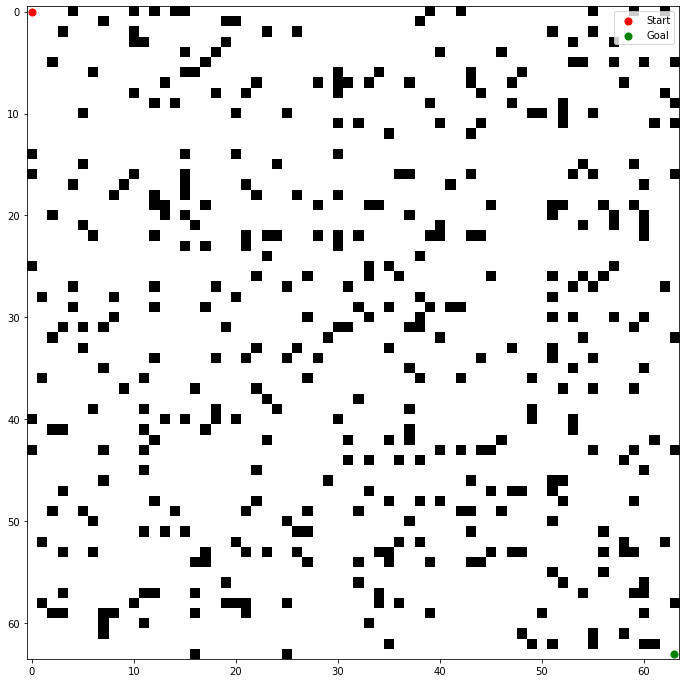

In [5]:


# Specify the starting and goal positions
startPos = (0,0)
goalPos = (width-1,height-1)

# Display the generated maze as a figure with starting and goal positions
maze_generator.display(startPos, goalPos)

In [9]:

class ValueIterationMazeSolver:
    def __init__(self, maze, startPos, goalPos, gamma=1, epsilon=1e-4):
        self.maze = maze
        self.startPos = startPos
        self.goalPos = goalPos
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Convergence threshold
        self.height, self.width = maze.shape  # Get maze dimensions
        self.V = np.zeros((self.height, self.width))  # Value function initialized to zeros

    def value_iteration(self):
        while True:
            delta = 0
            for i in range(self.height):
                for j in range(self.width):
                    if self.maze[i, j] == 1:  # Skip if it's a wall
                        self.V[i, j] = -np.inf
                        continue
                    v = self.V[i, j]
                    self.V[i, j] = self.compute_max_value(i, j)
                    delta = max(delta, abs(v - self.V[i, j]))
            if delta < self.epsilon:
                break

    def greedy_policy(self, i, j):
        if (i, j) == self.goalPos:
            return 0  # Value of the goal state is 0
        
        max_value = -np.inf
        next_v = np.zeros((4,1))
        # greedy_policy
        ac_idx = 0
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        for action in actions:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                next_v[ac_idx] = value
                max_value = max(max_value, value)
            else:
                next_v[ac_idx] = -np.inf
            ac_idx = ac_idx + 1

        greedy_actions = [i for i, tmp_v in enumerate(next_v) if tmp_v == max_value]
                  
        return actions[np.random.choice(greedy_actions)]

    def compute_max_value(self, i, j):
        if (i, j) == self.goalPos:
            return 0  # Value of the goal state is 0
        max_value = -np.inf
        for action in [(0, -1), (0, 1), (-1, 0), (1, 0)]:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                max_value = max(max_value, value)
        return -1 + self.gamma * max_value  # Reward: -1 for every movement

    def get_optimal_path(self):
        path = [self.startPos]
        i, j = self.startPos
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        while (i, j) != self.goalPos:
            max_value = -np.inf
            next_pos = None
            action = self.greedy_policy(i,j)
            i_, j_ = i + action[0], j + action[1]
            next_pos = (i_, j_)
            path.append(next_pos)
            i, j = next_pos
        return path



# Example usage:
solver = ValueIterationMazeSolver(maze_generator.grid, startPos, goalPos)
solver.value_iteration()

In [ ]:
class get_optimal_path:
    def __init__(self, maze_generator, startPos, goalPos, V):
        self.maze = maze_generator.grid
        self.startPos = startPos
        self.goalPos = goalPos
        self.height, self.width = self.maze.shape  # Get maze dimensions
        self.orig_V = V  # Value function initialized to zeros
        self.V = np.copy(self.orig_V) 

    def greedy_policy(self, i, j):
        if (i, j) == self.goalPos:
            return 0  # Value of the goal state is 0
        
        max_value = -np.inf
        next_v = np.zeros((4,1))
        # greedy_policy
        ac_idx = 0
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        for action in actions:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                next_v[ac_idx] = value
                max_value = max(max_value, value)
            else:
                next_v[ac_idx] = -np.inf
            ac_idx = ac_idx + 1

        greedy_actions = [i for i, tmp_v in enumerate(next_v) if tmp_v == max_value]
                  
        return actions[np.random.choice(greedy_actions)]
    
    def update_V_values(self):
        self.V = np.copy(self.orig_V)  # Copy original V values to temporary V values
        for obstacle in self.obstacles:
            row, col = obstacle
            neighbors = [(row+1, col), (row-1, col), (row, col+1), (row, col-1)]
            for r, c in neighbors:
                if 0 <= r < self.height and 0 <= c < self.width:
                    self.V[r, c] = -np.inf

    def get_optimal_path(self):
        path = [self.startPos]
        i, j = self.startPos
        maze_generator.obstacles = maze_generator.init_obstacles()
        while (i, j) != self.goalPos:
            next_pos = None
            self.update_V_values()
            action = self.greedy_policy(i,j)
            i_, j_ = i + action[0], j + action[1]
            next_pos = (i_, j_)
            path.append(next_pos)
            i, j = next_pos
            maze_generator.update_obstacles()
        return path




Optimal Path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (12, 4), (12, 5), (12, 6), (13, 6), (14, 6), (15, 6), (15, 7), (15, 8), (15, 9), (15, 10), (15, 11), (15, 12), (16, 12), (16, 13), (16, 14), (17, 14), (18, 14), (19, 14), (19, 15), (19, 16), (20, 16), (20, 17), (20, 18), (21, 18), (21, 19), (21, 20), (21, 21), (21, 22), (21, 23), (21, 24), (21, 25), (21, 26), (21, 27), (22, 27), (23, 27), (23, 28), (23, 29), (24, 29), (25, 29), (25, 30), (25, 31), (25, 32), (26, 32), (27, 32), (28, 32), (28, 33), (28, 34), (28, 35), (28, 36), (29, 36), (30, 36), (31, 36), (32, 36), (33, 36), (34, 36), (34, 37), (34, 38), (35, 38), (35, 39), (35, 40), (35, 41), (36, 41), (37, 41), (38, 41), (38, 42), (39, 42), (40, 42), (41, 42), (41, 43), (41, 44), (41, 45), (41, 46), (41, 47), (41, 48), (42, 48), (42, 49), (42, 50), (42, 51), (42, 52), (42, 53), (43, 53), (43, 54), (44, 54), (44, 55), (44, 56), (45, 56), (46

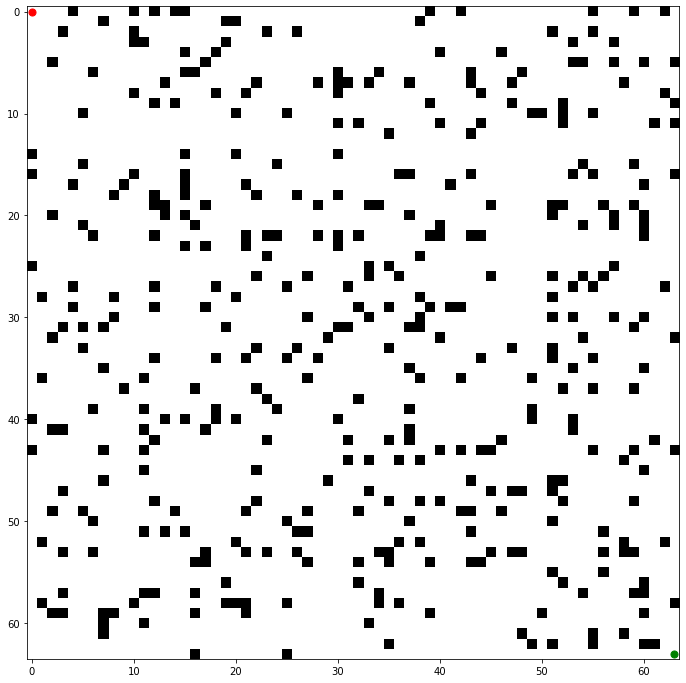

In [10]:
optimal_path = solver.get_optimal_path()
print("Optimal Path:", optimal_path)
# Display the maze with the learned path
ani = maze_generator.display(startPos, goalPos, optimal_path, animate=True)
ani.save('test.gif', writer='pillow')

Optimal Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (2, 36), (2, 37), (2, 38), (2, 39), (2, 40), (2, 41), (2, 42), (2, 43), (2, 44), (2, 45), (2, 46), (2, 47), (2, 48), (2, 49), (2, 50), (2, 51), (2, 52), (2, 53), (2, 54), (3, 54), (3, 55), (3, 56), (3, 57), (3, 58), (3, 59), (3, 60), (3, 61), (4, 61), (5, 61), (6, 61), (7, 61), (8, 61), (9, 61), (10, 61), (10, 62), (11, 62), (12, 62), (13, 62), (14, 62), (15, 62), (16, 62), (17, 62), (18, 62), (19, 62), (20, 62), (21, 62), (22, 62), (23, 62), (24, 62), (25, 62), (26, 62), (27, 62), (27, 63), (28, 63), (29, 63), (30, 63), (31, 63), (32, 63), (33, 63), (34, 63), (35, 63), (36, 63), (37, 63), (38, 63), (39, 63), (40, 63), (41, 63), (42, 63), (43, 6

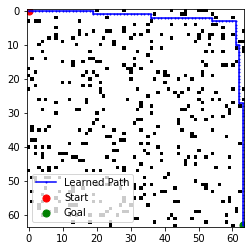

In [103]:
class DynamicMaze:
    def __init__(self, maze, startPos, goalPos, num_obstacls):
        self.maze = maze
        self.startPos = startPos
        self.goalPos = goalPos
        self.num_obstacls = num_obstacls  # Discount factor

    def init_obstacles(self):
        obstacles = []
        for _ in range(self.num_obstacles):
            obstacle = self.generate_obstacle_position()
            obstacles.append(obstacle)
        return obstacles

    def generate_obstacle_position(self):
        while True:
            obstacle = [random.randint(0, self.height - 1), random.randint(0, self.width - 1)]
            if self.grid[obstacle[0], obstacle[1]] == 0:  # Check if the position is empty
                return obstacle

    def update_obstacles(self):
        for obstacle in self.obstacles:
            # Generate random direction
            direction = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0), (0,0)])
            # Calculate new position
            new_position = [obstacle[0] + direction[0], obstacle[1] + direction[1]]
            # Check boundaries and collisions with static blocks
            if 0 <= new_position[0] < self.height and 0 <= new_position[1] < self.width:
                if self.grid[new_position[0], new_position[1]] == 0:  # Check if the position is empty
                    obstacle[:] = new_position
